In [231]:
##importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

##importing breast cancer dataset
df = pd.read_csv('breast cancer data.csv')

                      
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [232]:
df.dtypes

ID                           int64
Diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_SE                  float64
texture_SE                 float64
perimeter_SE               float64
area_SE                    float64
smoothness_SE              float64
compactness_SE             float64
concavity_SE               float64
concave_points_SE          float64
symmetry_SE                float64
fractal_dimension_SE       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [233]:
##convert barenuclei from type Object to discrete numeric value
df['Diagnosis'] = pd.Categorical(df['Diagnosis'])
df['Diagnosis'] = df.Diagnosis.cat.codes
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [234]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 32)


In [235]:
import seaborn as sns

## splits each variable into malignant and benign values to be used in below graphs
mal_rad = df[df['Diagnosis'] == 1]['radius_mean']
ben_rad = df[df['Diagnosis'] == 0]['radius_mean']
mal_texture = df[df['Diagnosis'] == 1]['texture_mean']
ben_texture = df[df['Diagnosis'] == 0]['texture_mean']
mal_perim = df[df['Diagnosis'] == 1]['perimeter_mean']
ben_perim = df[df['Diagnosis'] == 0]['perimeter_mean']
mal_area = df[df['Diagnosis'] == 1]['area_mean']
ben_area = df[df['Diagnosis'] == 0]['area_mean']
mal_smooth = df[df['Diagnosis'] == 1]['smoothness_mean']
ben_smooth = df[df['Diagnosis'] == 0]['smoothness_mean']
mal_compact = df[df['Diagnosis'] == 1]['compactness_mean']
ben_compact = df[df['Diagnosis'] == 0]['compactness_mean']
mal_conc = df[df['Diagnosis'] == 1]['concavity_mean']
ben_conc = df[df['Diagnosis'] == 0]['concavity_mean']
mal_cp = df[df['Diagnosis'] == 1]['concave_points_mean']
ben_cp = df[df['Diagnosis'] == 0]['concave_points_mean']
mal_sym = df[df['Diagnosis'] == 1]['symmetry_mean']
ben_sym = df[df['Diagnosis'] == 0]['symmetry_mean']
mal_fd = df[df['Diagnosis'] == 1]['fractal_dimension_mean']
ben_fd = df[df['Diagnosis'] == 0]['fractal_dimension_mean']

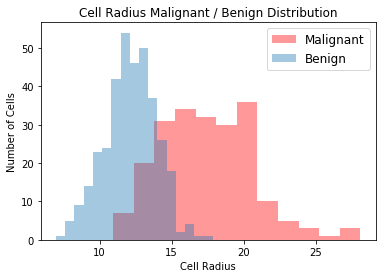

In [236]:
## creates histogram for radius (split between malignant cells and benign cells)
sns.distplot(mal_rad, kde=False, label = "Malignant", color="r")
sns.distplot(ben_rad, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Radius Malignant / Benign Distribution")
plt.xlabel("Cell Radius")
plt.ylabel("Number of Cells")
plt.savefig("Radius")

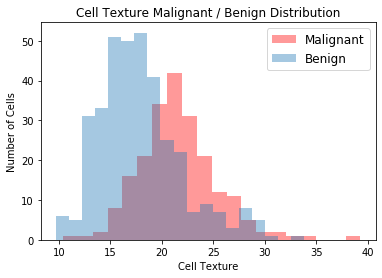

In [237]:
## creates histogram for texture (split between malignant cells and benign cells)
sns.distplot(mal_texture, kde=False, label = "Malignant", color="r")
sns.distplot(ben_texture, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Texture Malignant / Benign Distribution")
plt.xlabel("Cell Texture")
plt.ylabel("Number of Cells")
plt.savefig("Texture")

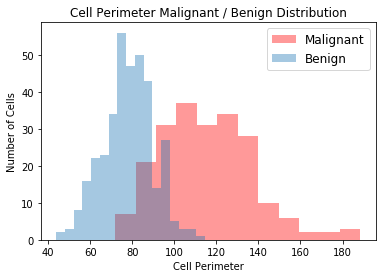

In [238]:
## creates histogram for perimeter (split between malignant cells and benign cells)
sns.distplot(mal_perim, kde=False, label = "Malignant", color="r")
sns.distplot(ben_perim, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Perimeter Malignant / Benign Distribution")
plt.xlabel("Cell Perimeter")
plt.ylabel("Number of Cells")
plt.savefig("Perimeter")

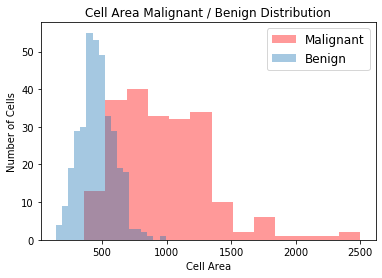

In [239]:
## creates histogram for area (split between malignant cells and benign cells)
sns.distplot(mal_area, kde=False, label = "Malignant", color="r")
sns.distplot(ben_area, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Area Malignant / Benign Distribution")
plt.xlabel("Cell Area")
plt.ylabel("Number of Cells")
plt.savefig("Area")

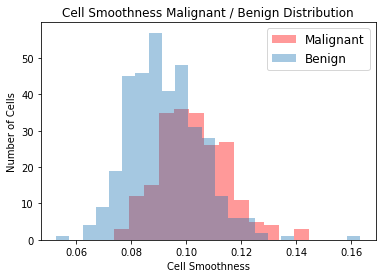

In [240]:
## creates histogram for smoothness (split between malignant cells and benign cells)
sns.distplot(mal_smooth, kde=False, label = "Malignant", color="r")
sns.distplot(ben_smooth, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Smoothness Malignant / Benign Distribution")
plt.xlabel("Cell Smoothness")
plt.ylabel("Number of Cells")
plt.savefig("Smoothness")

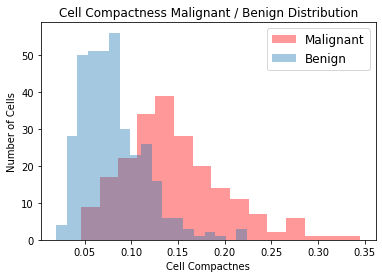

In [241]:
## creates histogram for compactness (split between malignant cells and benign cells)
sns.distplot(mal_compact, kde=False, label = "Malignant", color="r")
sns.distplot(ben_compact, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Compactness Malignant / Benign Distribution")
plt.xlabel("Cell Compactnes")
plt.ylabel("Number of Cells")
plt.savefig("Compactness")

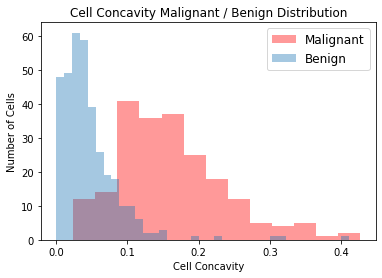

In [242]:
## creates histogram for concavity (split between malignant cells and benign cells)
sns.distplot(mal_conc, kde=False, label = "Malignant", color="r")
sns.distplot(ben_conc, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Concavity Malignant / Benign Distribution")
plt.xlabel("Cell Concavity")
plt.ylabel("Number of Cells")
plt.savefig("Concavity")

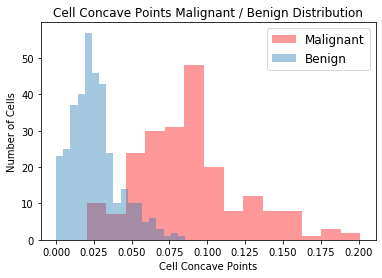

In [243]:
## creates histogram for concave points (split between malignant cells and benign cells)
sns.distplot(mal_cp, kde=False, label = "Malignant", color="r")
sns.distplot(ben_cp, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Concave Points Malignant / Benign Distribution")
plt.xlabel("Cell Concave Points")
plt.ylabel("Number of Cells")
plt.savefig("Concave Points")

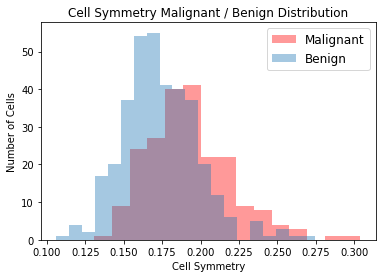

In [244]:
## creates histogram for symmetry (split between malignant cells and benign cells)
sns.distplot(mal_sym, kde=False, label = "Malignant", color="r")
sns.distplot(ben_sym, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Symmetry Malignant / Benign Distribution")
plt.xlabel("Cell Symmetry")
plt.ylabel("Number of Cells")
plt.savefig("Symmetry")

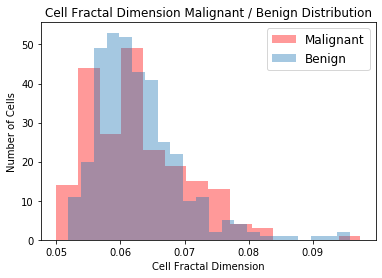

In [245]:
## creates histogram for fractal dimension (split between malignant cells and benign cells)
sns.distplot(mal_fd, kde=False, label = "Malignant", color="r")
sns.distplot(ben_fd, kde=False, label = "Benign")
plt.legend(prop={'size':12})
plt.title("Cell Fractal Dimension Malignant / Benign Distribution")
plt.xlabel("Cell Fractal Dimension")
plt.ylabel("Number of Cells")
plt.savefig("Fractal Dimension")

In [246]:
target = df.pop('Diagnosis')

In [247]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

In [248]:
##split dataset into testing and training 
full_dataset = dataset.shuffle(len(df)).batch(1)
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)

In [249]:
##create model with Stochastic Gradient Descent and Sigmoid neurons
from keras import optimizers
def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
      ])
    
    sgd = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(optimizer=sgd,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [250]:
##fit model
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Train on 398 steps
Epoch 1/15
398/398 [==============================] - 2s 4ms/step - loss: 222755391.7908 - acc: 0.6206
Epoch 2/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6844 - acc: 0.6332
Epoch 3/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6803 - acc: 0.6281
Epoch 4/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6808 - acc: 0.6030
Epoch 5/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6741 - acc: 0.6307
Epoch 6/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6708 - acc: 0.6332
Epoch 7/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6722 - acc: 0.6181
Epoch 8/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6696 - acc: 0.6231
Epoch 9/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6654 - acc: 0.6332
Epoch 10/15
398/398 [==============================] - 1s 2ms/step - loss: 0.6624 - acc: 0.6382
Epoch 11/15
398/398 [=

In [251]:
##evaluate model with testing data
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)

print('\nTest accuracy:', test_acc)

171/171 - 1s - loss: 0.6422 - acc: 0.6784

Test accuracy: 0.67836255
